In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import sympy as sp
import scipy.integrate as sc
import scipy.optimize as sco

In [2]:
def dydx(y,x):
    return 9*y - 20*(y**3) - (x**3)*(y**2)

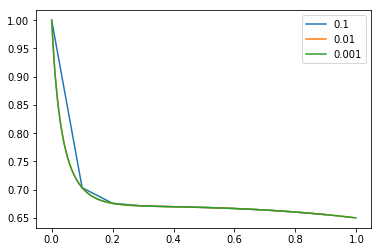

In [6]:
x = np.arange(0, 1, 0.1)
y0 = 1
y = sc.odeint(dydx, y0, x)
plt.plot(x, y, label=0.1)
plt.plot(np.arange(0, 1, 0.01), sc.odeint(dydx, y0, np.arange(0, 1, 0.01)), label=0.01)
plt.plot(np.arange(0, 1, 0.001), sc.odeint(dydx, y0, np.arange(0, 1, 0.001)), label=0.001)
plt.legend()

In [9]:
d_ = [j for i, j in enumerate(sc.odeint(dydx, y0, np.arange(0, 1, 0.001))) if i%10 == 0]
np.mean(d_ - sc.odeint(dydx, y0, np.arange(0, 1, 0.01)))

-1.9397602413206983e-11

In [10]:
x = np.arange(0, 1, 0.01)
y0 = 1
y = sc.odeint(dydx, y0, x)


In [11]:
def eiler(f, a, b, n, x0, y0):
    x = []; x.append(x0)
    y = []; y.append(y0)
    h = (b-a)/(n+1)
    for i in range(1, n):
        x.append(x[i-1]+h)
        y.append(y[i-1] + h*f(y[i-1], x[i-1]))
    return [x, y]

In [12]:
max(abs(sc.odeint(dydx, y0, np.arange(0, 1, 0.01)).flatten() - np.array(eiler(dydx, 0, 1, 100, 0, 1)[1])))

0.02412935043398934

In [13]:
def dydx_Dy(x,y):
    return 9 - 60*(y**2) - 2*y*(x**3)

10 - 0.7035555949318811 - 1.0 - 1.8181818181818183
100 - 0.02412935043398934 - 0.02823759598887376 - 0.82463140448446
1000 - 0.001957976350892787 - 0.002369578895502156 - 0.9823630704346469
10000 - 0.00019258755530182636 - 0.0002334879994899963 - 0.9982353203026875
100000 - 1.922046581759318e-05 - 2.329811855735262e-05 - 0.9998235221774691
1000000 - 1.9134876262372202e-06 - 2.3163030834393687e-06 - 0.9999823521192337


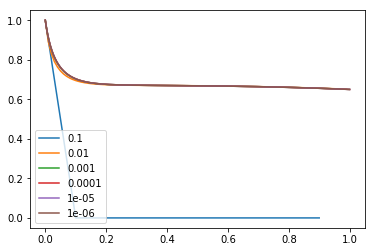

In [15]:
for n in [10, 100, 1000, 10000, 100000, 1000000]:
    a, b = 0, 1
    x_ = np.arange(a, b, 1/n)
    y0_ = 1
    y_ = sc.odeint(dydx, y0, x_).flatten()
    y2_ = eiler(dydx, a, b, n, 0, 1)[1]
    h = (b-a)/(n+1)
    g = ((1+h*dydx_Dy(x_[n-1], y2_[n-1])))
    print(n, '-', max(abs(y_ - np.array(y2_))), '-', max(abs((abs(y_ - np.array(y2_))/y_))), '-', g)
    
    plt.plot(x_, y2_, label=1/n)
plt.legend()

In [22]:
eiler(dydx, a, b, 1000000, 0, 1)

[[0,
  9.99999000001e-07,
  1.999998000002e-06,
  2.9999970000030004e-06,
  3.999996000004e-06,
  4.999995000005e-06,
  5.999994000006e-06,
  6.999993000007e-06,
  7.999992000008e-06,
  8.999991000009001e-06,
  9.999990000010002e-06,
  1.0999989000011003e-05,
  1.1999988000012003e-05,
  1.2999987000013004e-05,
  1.3999986000014005e-05,
  1.4999985000015005e-05,
  1.5999984000016004e-05,
  1.6999983000017005e-05,
  1.7999982000018006e-05,
  1.8999981000019006e-05,
  1.9999980000020007e-05,
  2.0999979000021008e-05,
  2.199997800002201e-05,
  2.299997700002301e-05,
  2.399997600002401e-05,
  2.499997500002501e-05,
  2.599997400002601e-05,
  2.6999973000027012e-05,
  2.7999972000028013e-05,
  2.8999971000029013e-05,
  2.9999970000030014e-05,
  3.099996900003101e-05,
  3.199996800003201e-05,
  3.2999967000033006e-05,
  3.3999966000034e-05,
  3.4999965000035e-05,
  3.5999964000036e-05,
  3.6999963000036995e-05,
  3.799996200003799e-05,
  3.899996100003899e-05,
  3.999996000003999e-05,
  4.0

In [16]:
def neeiler(f, a, b, n, y0):
    y = [0 for i in range(n)]; x = [0 for i in range(n)]; z = y0
    y[0] = y0
    h = (b-a)/(n+1)
    for i in range(0, n):
        x[i]= a+i*h
    for i in range(0, n-1):
        def f2(z):
            return z - y[i] -h*f(z, x[i+1])
        y[i+1] = sco.root(f2, z).get('x')[0]
        
    return [x, y]

10 - 0.0751048178708803 - 0.10675036686781236 - -0.6415028721314682
100 - 0.018219284172192762 - 0.022417885500219992 - 0.8246847373437348
1000 - 0.00208741433347448 - 0.0025459764463318596 - 0.982363622015113
10000 - 0.0002120734919407452 - 0.00025817921988604127 - 0.9982353258369911
100000 - 2.124985711093874e-05 - 2.587197638330097e-05 - 0.9998235222328308
1000000 - 2.1351717137685355e-06 - 2.601382966868328e-06 - 0.9999823521197873


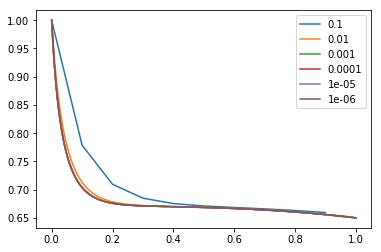

In [18]:
for n in [10, 100, 1000, 10000, 100000, 1000000]:
    a, b = 0, 1
    x_ = np.arange(a, b, 1/n)
    y0_ = 1
    y_ = sc.odeint(dydx, y0, x_).flatten()
    y2_ = neeiler(dydx, a, b, n, 1)[1]
    h = (b-a)/(n+1)
    g = ((1+h*dydx_Dy(x_[n-1], y2_[n-1])))
    print(n, '-', max(abs(y_ - np.array(y2_))), '-', max(abs((abs(y_ - np.array(y2_))/y_))), '-', g)
    
    plt.plot(x_, y2_, label=1/n)
plt.legend()


In [25]:
neeiler(dydx, a, b, 1000000, 1)

[[0.0,
  9.99999000001e-07,
  1.999998000002e-06,
  2.9999970000030004e-06,
  3.999996000004e-06,
  4.999995000005e-06,
  5.999994000006001e-06,
  6.999993000007001e-06,
  7.999992000008e-06,
  8.999991000009001e-06,
  9.99999000001e-06,
  1.0999989000011001e-05,
  1.1999988000012002e-05,
  1.2999987000013e-05,
  1.3999986000014001e-05,
  1.4999985000015e-05,
  1.5999984000016e-05,
  1.6999983000017e-05,
  1.7999982000018002e-05,
  1.8999981000019e-05,
  1.999998000002e-05,
  2.0999979000021e-05,
  2.1999978000022002e-05,
  2.2999977000023002e-05,
  2.3999976000024003e-05,
  2.4999975000025e-05,
  2.5999974000026e-05,
  2.6999973000027002e-05,
  2.7999972000028003e-05,
  2.8999971000029003e-05,
  2.999997000003e-05,
  3.0999969000031005e-05,
  3.1999968000032e-05,
  3.2999967000033e-05,
  3.3999966000034e-05,
  3.4999965000035e-05,
  3.5999964000036005e-05,
  3.6999963000037e-05,
  3.7999962000038e-05,
  3.8999961000039003e-05,
  3.999996000004e-05,
  4.0999959000041005e-05,
  4.199995

In [19]:
def runge4(f, a, b, n, y0):
    x = [a]; y = [y0]; h = (b-a)/n
    for i in range(0, n-1):
        x.append(x[i] + h)
        k1 = f(y[i], x[i])
        k2 = f(y[i] + h*k1/2, x[i]+h/2)
        k3 = f(y[i] + h*k2/2, x[i]+h/2)
        k4 = f(y[i]+h*k3, x[i]+h)
        y.append(y[i]+h*(k1+2*k2+2*k3+k4)/6)
    return [x, y]

10 - 0.36821946115913073 - 0.523369388022253 - -0.6138545979067997
100 - 8.609793348934858e-06 - 1.0075690466679487e-05 - 0.8251447388450589
1000 - 3.2913058389816285e-08 - 3.3616743507820184e-08 - 0.9823684784419119
10000 - 4.8348119729979544e-08 - 4.948371565373437e-08 - 0.9982353746652523
100000 - 2.381865360501223e-08 - 3.118146124892793e-08 - 0.9998235227213781
1000000 - 2.2084339246219997e-08 - 3.063464539542942e-08 - 0.999982352124673


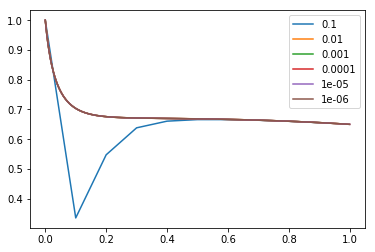

In [20]:
for n in [10, 100, 1000, 10000, 100000, 1000000]:
    a, b = 0, 1
    x_ = np.arange(a, b, 1/n)
    y0_ = 1
    y_ = sc.odeint(dydx, y0, x_).flatten()
    y2_ = runge4(dydx, a, b, n, 1)[1]
    h = (b-a)/(n+1)
    g = ((1+h*dydx_Dy(x_[n-1], y2_[n-1])))
    print(n, '-', max(abs(y_ - np.array(y2_))), '-', max(abs((abs(y_ - np.array(y2_))/y_))), '-', g)
    
    plt.plot(x_, y2_, label=1/n)
plt.legend()

In [27]:
runge4(dydx, a, b, 1000000, 1)

[[0,
  1e-06,
  2e-06,
  3e-06,
  4e-06,
  4.9999999999999996e-06,
  5.999999999999999e-06,
  6.999999999999999e-06,
  8e-06,
  9e-06,
  1e-05,
  1.1000000000000001e-05,
  1.2000000000000002e-05,
  1.3000000000000003e-05,
  1.4000000000000003e-05,
  1.5000000000000004e-05,
  1.6000000000000003e-05,
  1.7000000000000003e-05,
  1.8000000000000004e-05,
  1.9000000000000004e-05,
  2.0000000000000005e-05,
  2.1000000000000006e-05,
  2.2000000000000006e-05,
  2.3000000000000007e-05,
  2.4000000000000007e-05,
  2.5000000000000008e-05,
  2.600000000000001e-05,
  2.700000000000001e-05,
  2.800000000000001e-05,
  2.900000000000001e-05,
  3.000000000000001e-05,
  3.100000000000001e-05,
  3.2000000000000005e-05,
  3.3e-05,
  3.4e-05,
  3.5e-05,
  3.5999999999999994e-05,
  3.699999999999999e-05,
  3.799999999999999e-05,
  3.8999999999999986e-05,
  3.999999999999998e-05,
  4.099999999999998e-05,
  4.199999999999998e-05,
  4.2999999999999975e-05,
  4.399999999999997e-05,
  4.499999999999997e-05,
  4.